<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b >Campo Magnético generado por un Alambre

<p align="left">
<FONT FACE="times new roman" SIZE=4>
<i><b>Docente:</b>Ronald Hurtado</i>
<br>
<i><b>Asignatura:</b> Fisica Electromagentica</i>
<br>
<i><b>Estudiantes:</b> Isabella Ardila </i>
<br>
<i>21 de Julio del 2024</i>
<br>
</FONT>
</p>



<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b >Campo Magnético generado por un Alambre


Mientras se construye la bobina, mostramos cómo es el campo magnético generado alrededor de un alambre de longitud $L$ por el cual pasa una corriente $I$.

In [14]:
#Importación de librerias
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ipywidgets import interact

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b >¿Qué hace el codigo y como funciona?


### Descripción General

El código define una función `CampoAlambreCompleto` que calcula y visualiza el campo magnético total generado por dos alambres rectos en el plano yz. Utiliza métodos de integración numérica para calcular el campo magnético en un punto debido a cada alambre y luego visualiza el resultado usando gráficos.

### Función Interna: `CampoAlambre`

Dentro de `CampoAlambreCompleto`, se define una función auxiliar llamada `CampoAlambre`. Esta función calcula el campo magnético en un punto `P` debido a un alambre recto ubicado en `Q`, con longitud `L` y corriente `I`. Utiliza la Ley de Biot-Savart para hacer esto. La función divide el alambre en segmentos pequeños, calcula la contribución al campo magnético de cada segmento y suma estas contribuciones para obtener el campo total en el punto `P`.

### Cálculo del Campo Magnético Total

La función `CampoAlambreCompleto` utiliza `CampoAlambre` para calcular el campo magnético en el punto de observación `P` debido a los dos alambres, `Q1` y `Q2`, con corrientes `I1` e `I2` respectivamente. Luego, suma los campos magnéticos de los dos alambres para obtener el campo total en `P`. La magnitud del campo total se calcula y se imprime junto con las componentes en los ejes x, y, y z.

### Visualización del Campo Magnético en el Plano yz

La función `CampoRejilla` se utiliza para calcular el campo magnético en una rejilla de puntos en el plano yz. Para cada punto en la rejilla, calcula el campo magnético debido a un alambre y almacena las componentes en las direcciones y y z. Luego, la función `CampoAlambreCompleto` usa estos resultados para generar gráficos.

El código crea dos tipos de gráficos:
1. **Gráfico de Vectores (quiver plot)**: Muestra las direcciones y magnitudes del campo magnético en el plano yz usando flechas.
2. **Gráfico de Líneas de Corriente (streamplot)**: Muestra el flujo del campo magnético en el plano yz usando líneas de corriente, con un color que indica la magnitud del campo.

### Gráfico de la Magnitud del Campo Magnético

Además de los gráficos de campo magnético en el plano yz, el código genera un gráfico de la magnitud del campo magnético a lo largo del eje y para un punto fijo en el eje z. Calcula esta magnitud para una serie de posiciones en el eje y y grafica cómo varía con la distancia. Para las posiciones donde el campo es cero, el código evita conectar discontinuidades en la gráfica.

### Función Interactiva

Finalmente, se define una función `CampoInteract` que permite ajustar interactivamente la posición y corriente del segundo alambre. Utiliza `ipywidgets.interact` para crear un widget que permite al usuario modificar estos parámetros y ver cómo cambia el campo magnético en el plano yz en tiempo real.

Este código proporciona una herramienta completa para el análisis y visualización del campo magnético generado por múltiples alambres, facilitando la comprensión y la exploración de los efectos magnéticos en un plano específico.

In [15]:
#Clase Madre
def CampoAlambreCompleto(Q1, P, L, I1,  N=10,Q2=0,I2=0):
  #Clase campo magnético
    def CampoAlambre(Q, P, L, I, N=10):
        mu0 = 4 * np.pi * 1e-7
        x = np.linspace(-L/2, L/2, N)
        ra = np.array([x, np.zeros(N), np.zeros(N)]).T
        rb = np.array([0, P[1] - Q[1], 0])
        rc = np.array([0, 0, P[2] - Q[2]])
        r = ra + rb + rc
        ds = np.array([L / N, 0, 0])
        dB = (mu0 / (4 * np.pi)) * np.cross(np.tile(I * ds, (N, 1)), r) / np.linalg.norm(r, axis=1)[:, None]**3
        B = np.sum(dB, axis=0)
        return B

    B1 = CampoAlambre(Q1, P, L, I1, N)
  #Casos de cuando es un alambre o dos
    if(Q2 != 0) and (I2 != 0):
      B2 = CampoAlambre(Q2, P, L, I2, N)
      B_magnitude = np.linalg.norm(B1+B2)

      print(f"Componente del campo  en x: Bx = {B1[0]+B2[0]} T")
      print(f"Componente del campo en y: By = {B1[1]+B2[1] } T")
      print(f"Componente del campo en z: Bz = {B1[2]+B2[2]} T")
      print(f"Magnitud del campo: B = {B_magnitude} T")
    else :
      B2 = None
      B_magnitude = np.linalg.norm(B1)
      print(f"Componente del campo del alambre en x: Bx = {B1[0]} T")
      print(f"Componente del campo del alambre  en y: By = {B1[1] } T")
      print(f"Componente del campo del alambre  en z: Bz = {B1[2]} T")
      print(f"Magnitud del campo: B = {B_magnitude} T")

  #Campo Rejilla
    def CampoRejilla(Q, y, z, L, I, N=10):
        By = np.zeros((len(y), len(z)))
        Bz = np.zeros((len(y), len(z)))
        for i in range(len(y)):
            for j in range(len(z)):
                P = [0, y[i], z[j]]
                B = CampoAlambre(Q, P, L, I, N)
                By[i, j] = B[1]
                Bz[i, j] = B[2]
        return By, Bz

    y = np.linspace(-0.3, 0.1, 20)
    z = np.linspace(-0.2, 0.2, 20)
    Z, Y = np.meshgrid(z, y)

    By1, Bz1 = CampoRejilla(Q1, y, z, L, I1, N)
  #Caso si hay uno solo o dos alambres
    if(B2 is not None ):
      By2, Bz2 = CampoRejilla(Q2, y, z, L, I2, N)

      U = Bz1 + Bz2
      V = By1 + By2
    else:
      U = Bz1
      V = By1

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    ax1.quiver(Z, Y, U, V, angles='xy', width=.005)
    ax1.set(xlabel='Distancia eje z (m)', ylabel='Distancia eje y (m)', xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
    ax1.scatter(Z, Y, color='r', s=3)
    ax1.grid()

    ax2.streamplot(Z, Y, U, V, density=2, color=100 * np.sqrt(U**2 + V**2))
    ax2.set(xlabel='Distancia eje z (m)', xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
    ax2.grid()

    fig.suptitle('Campo magnético producido por el alambre en el plano yz', fontsize=16)
    plt.show()

    Q1 = np.array([0, -0.5, 0])   # Posición del alambre Q[a,b,c]
    B0 = np.array([0, 0, 0])

    y_plot = np.linspace(-1, 1, 200)

    B1_plot = np.zeros(shape=len(y_plot))

    for i in range(len(y_plot)):
        P1 = np.array([0, y_plot[i], 0])
        B0 = CampoAlambre(Q1, P1, L, I1, N)
        B1_plot[i] = np.linalg.norm(B0)
        # cómo no conectar la discontinuidad
        if B1_plot[i] == 0:
            B1_plot[i] = None

    fig1, ax1 = plt.subplots()
    ax1.plot(y_plot, B1_plot)

    ax1.set(xlabel='Distancia eje y (m)', ylabel='Campo magnético (T)',
            title='Magnitud del campo magnético con la distancia, para el caso el eje y',
            xlim=(-1, 1), ylim=(0, 0.00004))
    ax1.grid()

    plt.show()

    def CampoInteract(Q2y=-0.05, Q2z=0, I=-1):
        Q2 = np.array([0, Q2y, Q2z])
        By2, Bz2 = CampoRejilla(Q2, y, z, L, I, N)
        U = Bz1 + Bz2
        V = By1 + By2
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        ax1.quiver(Z, Y, U, V, angles='xy', width=.005)
        ax1.set(xlabel='Distancia eje z (m)', ylabel='Distancia eje y (m)', xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
        ax1.scatter(Z, Y, color='r', s=3)
        ax1.grid()
        ax2.streamplot(Z, Y, U, V, density=2, color=100 * np.sqrt(U**2 + V**2))
        ax2.set(xlabel='Distancia eje z (m)', xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
        ax2.grid()
        fig.suptitle('Campo magnético producido por el alambre en el plano yz', fontsize=16)
        plt.show()

    if(B2 is not None):
        interact(CampoInteract, Q2y=(-0.15, 0, 0.05), Q2z=(-0.2, 0.2, 0.1), I=(-1, 1, 0.25))

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b >Un Alambre



Componente del campo del alambre en x: Bx = 0.0 T
Componente del campo del alambre  en y: By = -2.4732487574881512e-08 T
Componente del campo del alambre  en z: Bz = 2.9678985089857807e-08 T
Magnitud del campo: B = 3.863338061321673e-08 T


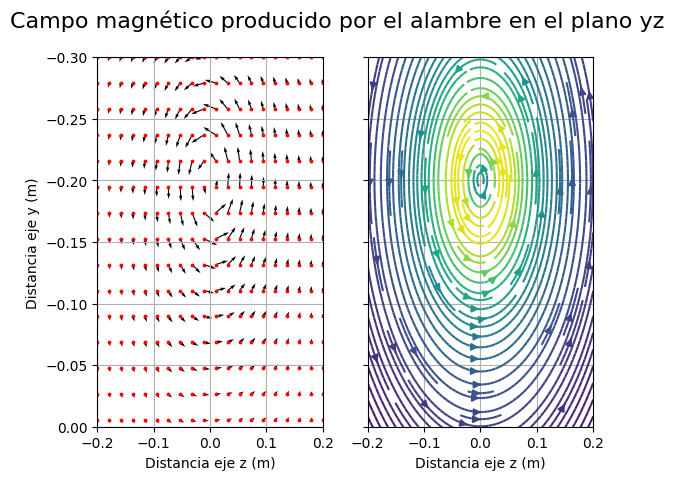

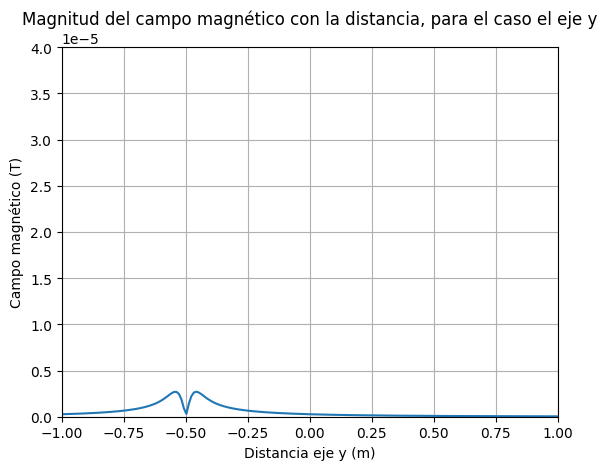

In [18]:
# Ejemplo de uso de la función general
Q1 = [0, -0.2, 0]
P = [1, 1, 1]
L = 1
I1 = 1
N = 10

CampoAlambreCompleto(Q1, P, L, I1, N)

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b >Dos Alambres



Componente del campo  en x: Bx = 0.0 T
Componente del campo en y: By = 6.8621273937951956e-09 T
Componente del campo en z: Bz = -7.181399040265013e-09 T
Magnitud del campo: B = 9.932838695166337e-09 T


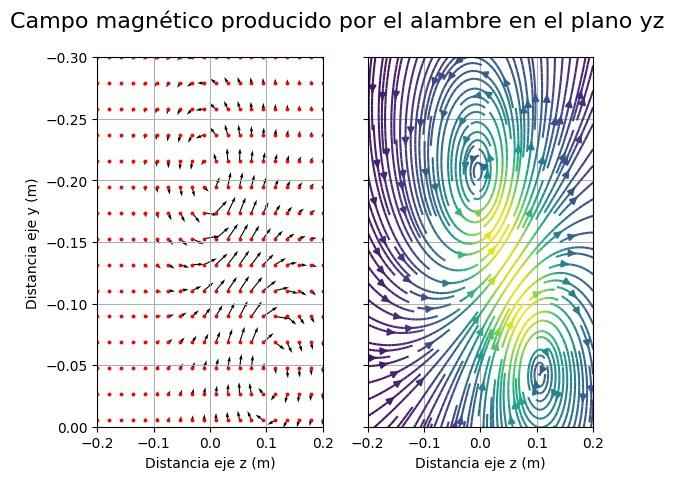

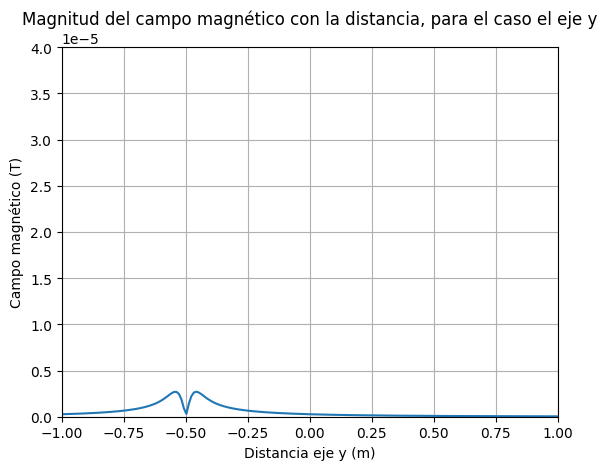

interactive(children=(FloatSlider(value=-0.05, description='Q2y', max=0.0, min=-0.15, step=0.05), FloatSlider(…

In [17]:
# Ejemplo de uso de la función general
Q1 = [0, -0.2, 0]
P = [1, 1, 1]
L = 1
I1 = 1
Q2 = [0, -0.05, 0.1]
I2 = -1
N = 10

CampoAlambreCompleto(Q1, P, L, I1, N, Q2, I2)
